# 8. Clustering
## K-means clustering

What if we do not have any training data? Unsupervised approach - k-means clustering can help learning the most suitable cluster structure given a suggested number of clusters $k$. 

Works for the data samples ($N$ points) in $n$-dimensional Euclidean space: 
$$
X=\{x_i, i=1..N\}=\{x_i^j, i=1..N, j=1..n\},
$$ 
where $x_i$ are the $n$-dimensional raw-vectors corresponding to each of the $N$ sample points. The approach is trying to infer cluster indexes $c_i$ (taking one of the possible values $1,2,...,k$) for each point $x_i$ in such a way that the cumulative squared distance from all the sample points $x_i$ to the centroids $\mu_{c_i}$ of the corresponding clusters $c_i$ is minimized. This is quite an intuitive criteria, meaning that the clusters as as compact as possible for the given number $k$. The cluster centroids are defined as simple vector means
$$
\mu_c=\sum_{i, c(i)=c} x_i/m(c),
$$
where
$$
m(c)=|\{i, c(i)=c\}|
$$
denotes the cluster size. Or in the coordinate form $\mu_c=(\mu_c^j, j=1..n)$
$$
\mu_c^j=\frac{\sum_{i, c(i)=c} x_i^j}{m(c)}, j=1..n.
$$
Then the mimimal cumulatize squared distance criteria can be written as
$$
SD=\sum_i \|x_i-\mu_{c_i}\|^2=\sum_{i,j} \left(x_i^j-\mu_{c_i}^j\right)^2\to \min
$$

The common algorithm (often called after Lloyd) starts from a random cluster assignment and iterates the following two steps:

A. Compute cluster means.

B. Re-assign each point to the cluster with the mean closest to the considered point.

Alternative approach is to initially use $k$ random points of the sample as clusters means, starting from the step B.

The algorithm stops once a new iteration fails to alter any single cluster assignment.

Algorithm always converges to a local optimum of $SD$, however there is no guarantee that this partitioning is indeed the global optimum. Also the final outcome happens to depend on the initial partitioning. This way it makes sense to repreat $k$-means a number of times (like $10,25...100$ etc) with different random initial partitioning, picking up the partitioning with the best final $SD$. 

In order to figure out how many trials to consider one can keep adding them one by one tracking how do they affect the final score and stop once it stays stable for a while.


### Toy Example 1

In [72]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
import numpy as np
%matplotlib inline

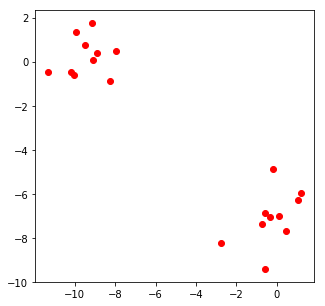

In [73]:
#generate artificual data for clustering
X, y = make_blobs(n_features=2, centers=2,n_samples=20,random_state=9)
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c="r")
plt.show()

#### Perform clustering by hand to illustrate the process for this simple example:

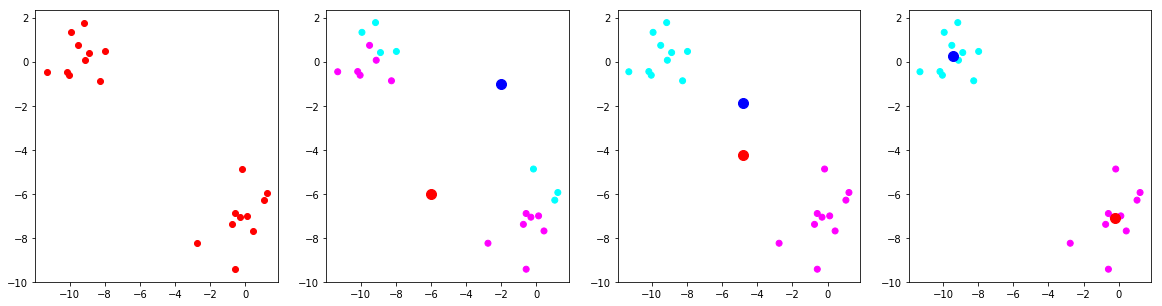

In [74]:
cent=np.asarray([[-6,-6],[-2,-1]]) #initial centroid
#original data visualization
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.scatter(X[:,0],X[:,1],c="r")
for i in range(3): #perform three iterations
    plt.subplot(1,4,i+2)
    y_t=np.sum((X-cent[0,:])**2,axis=1)**0.5<np.sum((X-cent[1,:])**2,axis=1)**0.5 #attach points to clustering based on centroid proximity
    #visualize clustering with different colors
    plt.scatter(X[:,0],X[:,1],c=y_t,cmap=plt.cm.cool)
    plt.scatter(cent[0,0],cent[0,1],c="r",s=100)
    plt.scatter(cent[1,0],cent[1,1],c="b",s=100)
    #recompute the centroids
    cent=np.asarray([[np.sum(X[:,0]*y_t)/(np.sum(y_t)),np.sum(X[:,1]*y_t)/np.sum(y_t)],
            [np.sum(X[:,0]*(1-y_t))/np.sum(1-y_t),np.sum(X[:,1]*(1-y_t))/np.sum(1-y_t)]])
plt.show()

In [5]:
#now do the same with KMeans from sklearn.cluster
from sklearn.cluster import KMeans
#initialize the model
km=KMeans(random_state=1,n_clusters=2) #look for two clusters; 
#k-means generally depends on random initial locations of the centroids, 
#so setting random state needed for result stability (although not really this time)
res=km.fit(X) #train the model
y_t=res.labels_
print(y_t) #output the result
# print res.predict(X) #alternative - one can pass this or other data to cluster according to the model trained (centroids) 

[0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0]


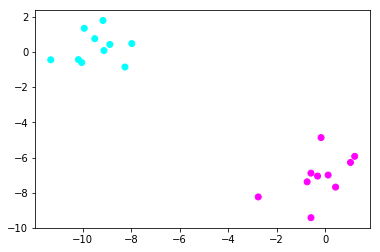

In [6]:
#visualize the clusters
plt.scatter(X[:,0],X[:,1],c=y_t,cmap=plt.cm.cool)

### Example 2: Picking the number of clusters

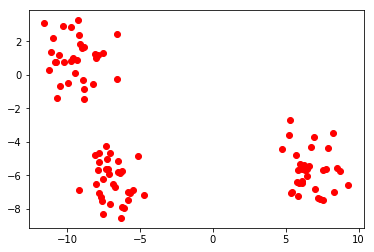

In [7]:
#generate another example 
X, y = make_blobs(n_features=2, centers=3,random_state=9999)
plt.scatter(X[:,0],X[:,1],c="r")
plt.show()

In [8]:
n=2 # number of clusters
tar=y # real target

#train the model
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(X)
print(res.labels_)

[0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1]


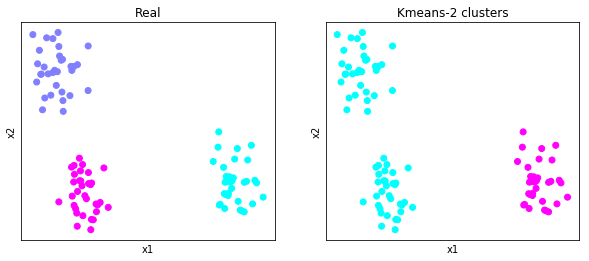

In [9]:
#Plot the original cluster assignment in the generated data against the results of k-means
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.scatter(X[:, 0], X[:, 1], c=tar, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Real")

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

### So maybe k=3 is more appropriate? 
We see it visualially and from knowing how data was generated, but how can we quantitatively figure it out?

### *Choose the number of clusters. (k)

#### Silhouette Coefficient
In the example above we visually see that the data could still be clustered further. So how to select the appropriate number of clusters $k$ besides just naive visual observations? 

We can't use SD here anymore as the more clusters we take, the smaller it goes, and we'll get it down to zero, assigning each point to its own cluster, which is certianly not the most useful way of clustering.

We need another partitioning quality measure here. Most common option is using a Silhouette measure, which for each data point $x_i$ quantifies its relative attachement strength to its current cluster vs the closest neighbor cluster:
$$
s(i)=\frac{\min\limits_{k\neq c_i} \|x_i-\mu_{c_k}\|-\|x_i-\mu_{c_i}\|}{\max\{\|x_i-\mu_{c_i}\|,\min\limits_{k\neq c_i} \|x_i-\mu_{c_k}\|\}}.
$$

Then internal quality of the partitioning is characterized by an average ratio value of silhouette for all the data points:
$$
S=\frac{\sum\limits_i s(i)}{N}.
$$

By definition, the silhouette measure is normalized. i.e. $-1\leq s(i)\leq 1$ and so is the average: $-1\leq S\leq 1$. $S=1$ means that all the points coinside with their cluster centroids, values close to 1 mean that the points are usually much closer to their cluster centroids than to all the other ones (i.e. clustered appropriately), values of $S$ around zero mean that clustering is quite unstable, i.e. moving many of the points to another clusters might not affect its quality much; while negative values of $S$ mean that clustering could certainly be improved by moving some of the points to the other clusters.

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

silhouette=[]
range_n_clusters = range(2,100)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    #report average Silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette.append(silhouette_avg)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.7368734857292675
For n_clusters =3, the average silhouette_score is :0.7671939254942522
For n_clusters =4, the average silhouette_score is :0.6349411044958128
For n_clusters =5, the average silhouette_score is :0.5320171643922585
For n_clusters =6, the average silhouette_score is :0.35330522911918777
For n_clusters =7, the average silhouette_score is :0.381401071882312
For n_clusters =8, the average silhouette_score is :0.38968941496703424
For n_clusters =9, the average silhouette_score is :0.3891416767338384
For n_clusters =10, the average silhouette_score is :0.40454145454793405
For n_clusters =11, the average silhouette_score is :0.4166365128577318
For n_clusters =12, the average silhouette_score is :0.4084428385651139
For n_clusters =13, the average silhouette_score is :0.4052853925822291
For n_clusters =14, the average silhouette_score is :0.41694813002751807
For n_clusters =15, the average silhouette_score is :0.40517378137301

ValueError: Number of labels is 100. Valid values are 2 to n_samples - 1 (inclusive)

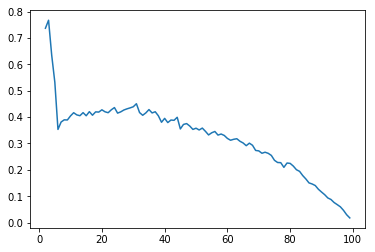

In [17]:
plt.plot(range(2,100), silhouette,'-')

In [13]:
#the highest one is acheived for k=3

#### From the result of silhouette_score, we should choose k=3. 
Let's also visualize the individual silhouette score distributions for each point. This allows to diagnose which exact clusters are in good standing and which might be a problem by comparing their members' scores against average

In [76]:
def silhouette_score_plot(data,range_n_clusters):
    X=data
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

('For n_clusters =', 2, 'The average silhouette_score is :', 0.7368734857292675)


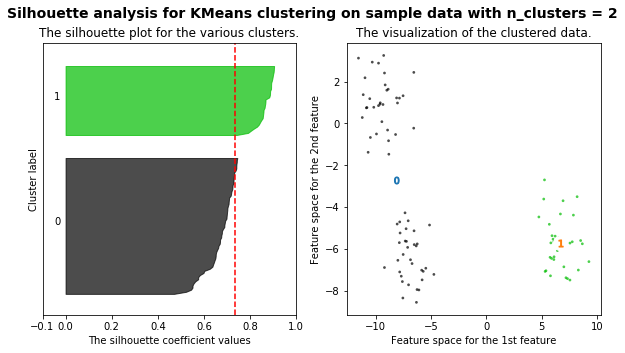

('For n_clusters =', 3, 'The average silhouette_score is :', 0.7671939254942522)


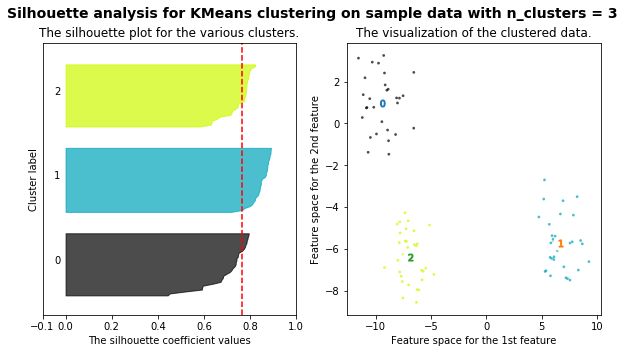

('For n_clusters =', 4, 'The average silhouette_score is :', 0.6349411044958128)


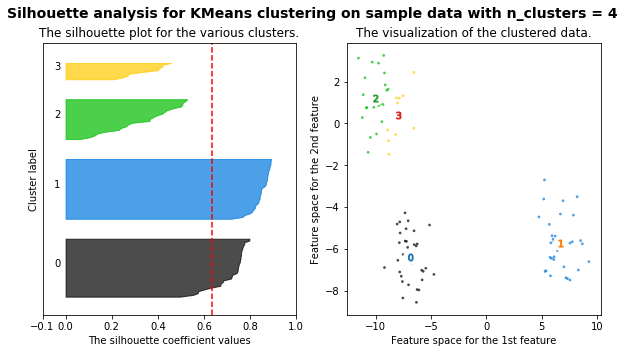

('For n_clusters =', 5, 'The average silhouette_score is :', 0.5320171643922585)


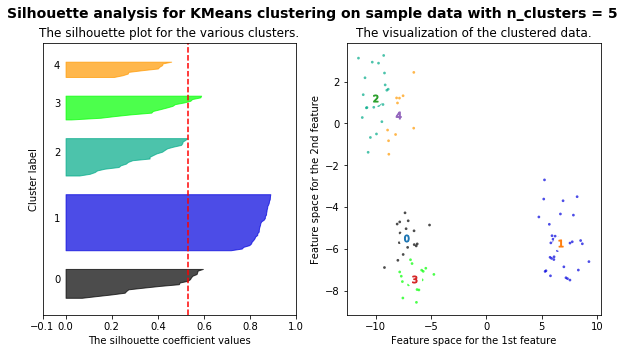

In [13]:
#plot
silhouette_score_plot(X,range(2,6))

### Elbow Method
The Elbow method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified.

First of all, compute the sum of squared error (SSE) for some values of k (for example 2, 4, 6, 8, etc.). The SSE is defined as the sum of the squared distance between each member of the cluster and its centroid. Mathematically:

$SSE=\sum^K_{i=1} \sum_{x\in c_i} dist(x,c_i)^2$

 If you plot k against the SSE, you will see that the error decreases as k gets larger; this is because when the number of clusters increases, they should be smaller, so distortion is also smaller. The idea of the elbow method is to choose the k at which the SSE decreases abruptly. This produces an "elbow effect" in the graph, as you can see in the following picture:


In [19]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

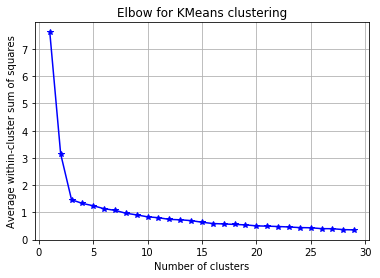

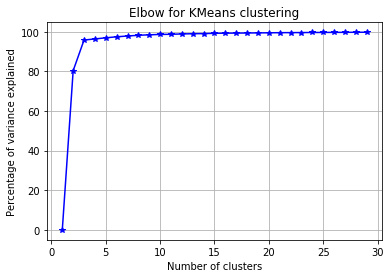

In [15]:
elbow(X, range(1,30))

### Example 3: Guassian Mixture and DBSCAN. When KMeans does not work well.

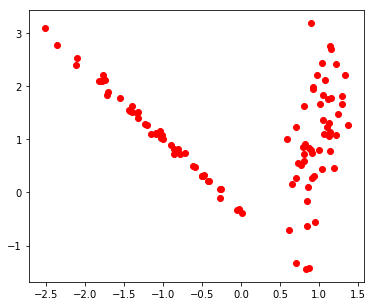

In [20]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1,random_state=13) #other good options: 13!!!, 14!!!, 17!!!, 19!!!, 5,8,12
plt.figure(figsize=(6,5))
plt.scatter(X[:,0],X[:,1],c="r")
plt.show()

In [21]:
# Real vs KMeans vs Guassian Mixture
n=2 # number of clusters
dd=X #data
tar=y # real target

km=KMeans(n_clusters=n)
res=km.fit(dd)
#res.labels_

Make sure that you are using the recent sklearn: 0.18. (The old verison does not work correctly)

If not, please go to the terminal and use the following code to upgrade it.

conda install scikit-learn

In [22]:
# Check Sklearn version.
import sklearn
sklearn.__version__

'0.20.0'

In [23]:
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
gm=GaussianMixture(n_components=n,random_state=324)
res1=gm.fit(dd)

In [24]:
from sklearn.cluster import DBSCAN

In [25]:
res2 = DBSCAN(eps=0.33, min_samples=4).fit(dd)
res2.labels_

array([-1,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  1,  0, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,
        0,  1,  1,  1,  0,  0,  1,  1, -1,  0, -1,  0, -1,  0,  1,  0, -1,
       -1,  0,  0,  0,  1, -1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  1, -1,
        0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  0,
        0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  1,  0,  1,  0,  0])

In [26]:
#resulting number of clusters other than noise
n_clusters_ = len(set(res2.labels_)) - (1 if -1 in res2.labels_ else 0)
n_clusters_

2

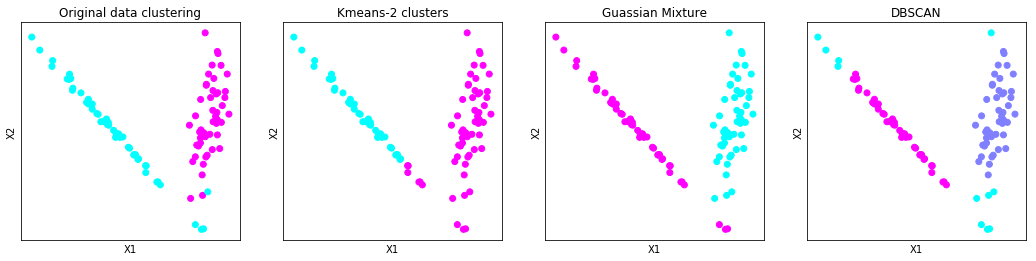

In [27]:
#Plot.
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
plt.scatter(dd[:, 0], dd[:, 1], c=tar, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Original data clustering")

plt.subplot(1,4,2)
plt.scatter(dd[:, 0], dd[:, 1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))

plt.subplot(1,4,3)
plt.scatter(dd[:, 0], dd[:, 1], c=res1.predict(dd), cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture")

plt.subplot(1,4,4)
plt.scatter(dd[:, 0], dd[:, 1], c=res2.labels_, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("DBSCAN")

plt.show()


### Example 4. Where even Gaussian Mixture fails - case for DBSCAN

In [28]:
n_samples = 1500
np.random.seed(0)
from sklearn import datasets
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
X=noisy_circles[0]
L=noisy_circles[1]

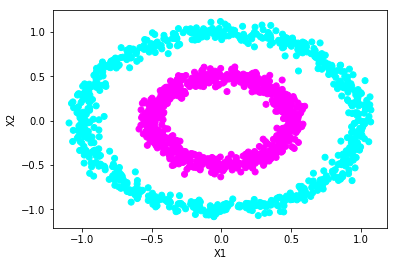

In [29]:
#original data clustering
plt.scatter(X[:, 0], X[:, 1], c=L, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')

In [30]:
#train Gaussian Mixture (as per above we should not even try k-means for such a case)
res1=GaussianMixture(n_components=n,random_state=324).fit(X)
L2=res1.predict(X)

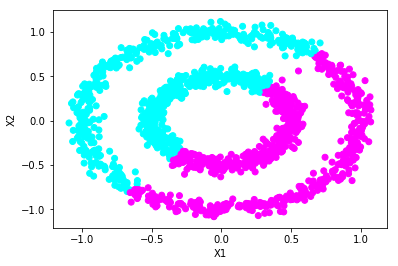

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=L2, cmap=plt.cm.cool)
plt.xlabel('X1');
plt.ylabel('X2');

In [32]:
#now try DBSCAN
res2 = DBSCAN(eps=0.1, min_samples=4).fit(X)
L2=res2.labels_

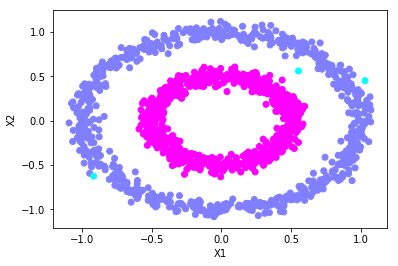

In [33]:
plt.scatter(X[:, 0], X[:, 1], c=L2, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')

### Real world case: 311 requests as a signature of urban location

Can we distinguish urban locations based on their 311 activity? Before we've seen that plotting location by PC's of their 311 activity can help distinguishing boroughs. This time lets directly cluster locations by their 311 signatures to see what exact zones do they identify and if this makes urban sense.

Use Kmeans to cluster NYC zip codes into 4 clusters. As before, the feature space is the percentages of 311 activity per category (from "Adopt A Basket" to the end) as provided.  Report the number of zip codes in each clusters. 

Visulize the clustering result on the map (for this part we will introduce geopandas).

This goes along the lines of our recent paper [Wang, L., Qian, C., Kats, P., Kontokosta, C., & Sobolevsky, S. (2017). Structure of 311 service requests as a signature of urban location. PloS one, 12(10), e0186314.]

In [34]:
#upload previous data we had on 311
data311 = pd.read_csv( 'data/aggr311.csv' , index_col=0 )
data311.head()

,Zip,Complain,Count
1,NaN,Adopt-A-Basket,5
2,10001,Adopt-A-Basket,1
3,10003,Adopt-A-Basket,1
4,10009,Adopt-A-Basket,1
5,10010,Adopt-A-Basket,1


In [37]:
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')

In [38]:
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes

In [39]:
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)

In [31]:
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,8,8,0,0,0,0,0
10001.0,0,1,90,0,0,1,20,36,1,1,...,3,0,2,51,5,5,2,366,0,0
10002.0,15,0,80,0,0,21,18,20,2,6,...,5,1,4,27,14,10,7,324,0,0
10003.0,15,1,143,0,2,44,24,13,2,2,...,7,11,2,54,25,12,5,318,0,0
10004.0,0,0,15,0,0,4,3,1,0,1,...,1,1,0,16,21,0,0,37,0,0


In [40]:
Total311=data311.sum(axis=1) #total 311 activity per zip code
data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity

In [41]:
#apply clustering
rr=KMeans(n_clusters=3, n_init=10, random_state=0).fit(data311)

In [42]:
max(rr.labels_)

2

In [43]:
#create a dictionary mapping zip codes to cluster labels
clust={data311.index[i]:rr.labels_[i] for i in range(len(rr.labels_))}

In [44]:
#create a dataframe
res=pd.DataFrame({'zipcode':data311.index, 'label':rr.labels_})

In [45]:
import geopandas as gpd

In [49]:
#read shapefiles of NYC zip codes
NYCzip=gpd.read_file('data/ZIP_CODE_040114.shp')

In [50]:
NYCzip.head() #geopandas looks pretty much like pandas dataframe including both - labels/parameters and geometry - of the shapes

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


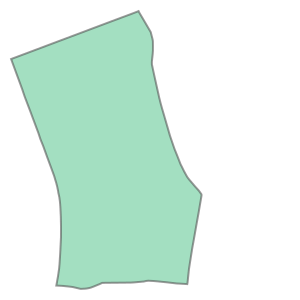

In [51]:
#additonal functionality is that shapes could be visualized; one-by-one
NYCzip.geometry[0]

In [66]:
NYCzip['ZIPCODE']=NYCzip['ZIPCODE'].astype(float)
NYCzip['Clust']=(NYCzip['ZIPCODE']).map(clust)

In [69]:
len(clust)

179

In [68]:
len(NYCzip['Clust'])

263

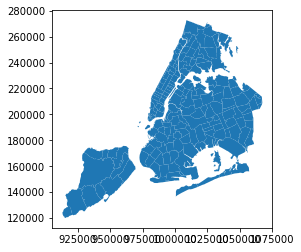

In [52]:
#or all together
NYCzip.plot()

In [70]:
#add a function visualizing shapes by cluster
from matplotlib.colors import LinearSegmentedColormap
colors=['green','blue','red','yellow','magenta']
def plot_on_map(gdf,Y): #take geopandas dataframe gdf with zip code shapefiles and the dictionary mapping zip codes to clusters
    #visualize zip codes using clusters for picking colors        
    f, ax = plt.subplots(1, figsize=(12, 12))     
    for c in range(max(Y.values())+1): #for each cluster
        gdf.loc[gdf['Clust']==c].plot(axes=ax, color=colors[c]) #visualize zip codes which belong to it using cluster color

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


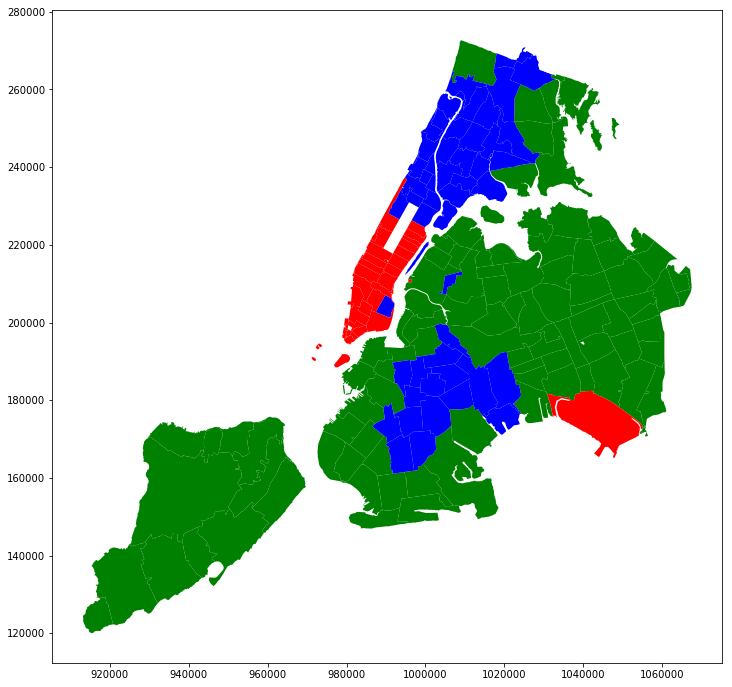

In [71]:
plot_on_map(NYCzip,clust)

### Real world data exercise. 2012 "stop and frisk" data

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City

The stop-question-and-frisk program, or stop-and-frisk, in New York City, is a practice of the New York City Police Department in which police officers stop and question a pedestrian, then frisk them for weapons and other contraband; this is what is known in other places in the United States as the Terry stop. The rules for stop, question, and frisk are found in the state's criminal procedure law section 140.50, and are based on the decision of the United States Supreme Court in the case of Terry v. Ohio. About 685,724 people were stopped in 2011. However, the number of stops has been reduced dramatically since then, to 22,939 in 2015.
Stop-and-frisk got increased attention in the 2016 presidential debate.

In [47]:
import pandas as pd
data1=pd.read_csv("data/stop_2012.csv", index_col='zipcode')
data1.head()

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_April,month_August,month_December,...,month_May,month_November,month_October,month_September,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,,,,,,,,,,,,,,,,
10472,278.0,212.0,315.0,213.0,254.0,234.0,241.0,158.0,95.0,142.0,...,104.0,96.0,110.0,123.0,349.0,35.0,57.0,206.0,437.0,663.0
10037,199.0,79.0,301.0,154.0,163.0,137.0,147.0,114.0,114.0,34.0,...,67.0,53.0,65.0,96.0,271.0,38.0,32.0,143.0,248.0,448.0
10460,278.0,169.0,283.0,203.0,234.0,197.0,289.0,117.0,133.0,91.0,...,95.0,86.0,148.0,175.0,462.0,51.0,56.0,190.0,411.0,483.0
11224,175.0,82.0,177.0,176.0,180.0,179.0,206.0,112.0,67.0,134.0,...,112.0,23.0,68.0,68.0,157.0,27.0,37.0,97.0,282.0,575.0
10456,979.0,647.0,1086.0,773.0,913.0,814.0,885.0,709.0,465.0,290.0,...,518.0,395.0,521.0,511.0,1295.0,137.0,110.0,662.0,1553.0,2340.0


In [48]:
#Q0. Find the zip code with most stops

In [49]:
#Q1. Cluster zip codes by stop&frisk timeline using k=2 clusters
# Visualize the result on the map using the function above. 
# Options: normalize by the total stops or not; use only the weekly/monthly/daily timeline alone or all together

In [50]:
#Q2. USe Elbow and Silhouette methods to get an idea of what the good k could be

In [51]:
#Q3. Repeat Q1 using Guassian Mixture model and DBSCAN